In [1]:
import theme
theme.load_style()

# Lesson 6: Variational Forms and Solution Methods

<img src='./Images/variational.d/intro.png'/>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

This lecture by Tim Fuller is licensed under the
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

In [2]:
from sympy import *
from numpy import linspace
from matplotlib.pyplot import plot, legend
init_printing()

<a id='top'></a>
# Topics

- [Why Variational Methods](#why)
- [Weighted Residual Methods](#resid-meths)
  - [Collocation](#collocation)
  - [Least Squaes](#lsq)
  - [Galerkin](#galerkin)
- [Exercises](#exercises)

# <a id='why'></a> Why Variational Methods?[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)
In the finite element method, the solution to the governing equation is approximated by

$$
u \approx u_N = \phi_0 + \sum_{i=1}^n u_i \phi_i
$$

and the unknown coefficients $u_i$ are found through an integral statement of the governing equation.  The integral statement is necessary because substitution of the approximate solution into the governing equation does not always result in the required number of linearly independent equations for $u_i$.  *Weighted integrals* allow one to insure that there are exactly $n$ equations for the $n$ unknown $u_i$.  We call $u_N$ the $N-$parameter approximate solution to $u$.

For example, suppose we wished to approximate the solution to

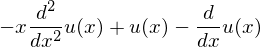

In [3]:
x, u1, u2 = symbols('x u1 u2')
u = Function('u')
L = lambda f: -diff(x * f.diff(x), x) + f
ode = L(u(x))
ode

with boundary conditions $u(0)=1$ and $\left(xu'\right)_{x=1}=0$.

Let's choose 

In [4]:
uN = u1 * (x ** 2 - 2 * x) + u2 * (x ** 3 - 3 * x) + 1
uN

<div class='msg msg-info'>
<p><strong>Remark</strong></p>
The approximate solution must satisfy the boundary conditions for all $u_i$.
</div>

The constants $u_1$ and $u_2$ are determined such that $u_N$ satisfies the governing equation in some sense.  If $u_N$ were to satisfy the governing equation exactly, we get

<div class='msg msg-info'><b>Remark</b><br>
By definining the approximate solution as a sum of homogeneous and nonhomogeneous parts, the nonhomogeneous essential boundary conditions can be satisfied by $\phi_0$, $\phi_0(x_0) = u_0$ and $\phi_i$ are required to satisfy the homgeneous form of the same boundary condition $\phi_i(x_0) = 0$.  In this way, $u_N$ satisfies the specified boundary conditions

$$
u_N(x_0) = \sum_{i=1}^Nc_i\phi_i(x_0) + \phi_0(x_0) = u_0
$$

If the specified essential boundary conditions are homogeneous the $\phi_0$ is taken to be zero and $\phi_i$ must still satisfy the same conditions $\phi_i(x_0)=0$
</div>

In [5]:
L(uN).series(x)

Since the expression must be zero for any value of $x$, the coefficients of any power of $x$ must be zero:

$$
\begin{split}
1+2u_1+3u_2 &= 0\\
-(6u_1+3u_2) &= 0\\
u_1-9u_2 &= 0\\
u_2 &= 0
\end{split}
$$

The above set of equations is inconsistent and no solution exists.

Rather than require that the approximate solution satisfy the governing equation exactly, let's require that it satisfies it in a weighted-integral sense:

$$
\int_0^1w\mathscr{R}dx=0
$$

where $\mathscr{R}$ is called the residual

$$
\mathscr{R}\equiv -\frac{du_N}{dx} - x\frac{d^2}{dx^2}+u_N
$$

and $w$ is called a weight function.

<div class='msg msg-info'><p><strong>Remark</strong></p>
The residual is the non-zero remainder obtained by substituting the approximate solution in to the governing equation.
</div>

A sufficiently many number of independent equations for $u_i$ are obtained by choosing an appropriate number of functions for $w$.  For example, let $w=1$ and $w=x$.  Then,

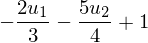

In [6]:
residual = L(uN)
w1 = 1
R1 = integrate(w1 * residual, (x, 0, 1))
R1

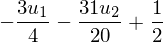

In [7]:
w2 = x
R2 = integrate(w2 * residual, (x, 0, 1))
R2

Which provide two linearly independent equations for $u_1$ and $u_2$

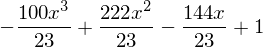

In [8]:
c = solve((R1, R2), u1, u2)
uN = uN.subs(c)
uN

We see that integral statements provide a means for generating as many equations are there are unkown coefficients in the approximate solution.  The above technique is an example of a variational method.  In variational methods, an approximate solution of the form of $u_n$ are sought and the coeficients $c_i$ are determined.

# <a id='resid-meths'></a> Weighted Residual Methods[<img src='./Images/top.png' style='width:20px;vertical-align:middle;float:right'/>](#top)

The objective of this section is to expose you to variational methods of approximation.  We will look at collocation, least-squares, and Galerkin methods.  In each of these methods, we seek an approximate solution in the form of a linear combination of approxmiation functions $\phi_i(x)$ and undetermined parameters $c_i$: $\sum_i c_i\phi_i$.  The parameters $c_i$ are determined such that the approximate solution satisfies a weighted integral form of the governing equation.  The finite element method makes use of variational methods to formulate the discrete equations over an element and this section will serve as an introduction to those concepts.

<a id='collocation'></a>
## Collocation Method

In the collocation method, we seek an approximate solution $u_n$ by requiring that the residual $\mathscr R$ vanishes at as many points $x_i$ as there are unknown coefficients:

$$
\mathscr{R}(x_i, c_j) = 0 \quad (i=1,2,\ldots,n)
$$

The collocation method is a special case of the weighted residual formulation with $w=\delta(x-x_i)$, where $\delta(x)$ is the Dirac delta function, which is defined by

$$
\int_{-\infty}^{\infty}f(x)\delta(x-x_i)dx = f(x_i)
$$

With this choice of weight functions, the weighted-residual statement is

$$
\int_{\Omega}\delta(x-x_i)\mathscr{R}(x_i, c_j)dx = 0
$$

or

$$
\mathscr{R}(x_i, c_j) = 0
$$

<a id='lsq'></a>
## Least Squares Method

In the least squares method we wish to minimize residual in the sense of least squares. Mathematically we say that we wish to minimize the integral of the square of the residual on some interval

$$
   \min\int_{x_0}^{x_f}\mathscr R^2\,dx
$$


Recall from calculus, that the minimum of a function occurs where its first derivative, with respect to the minimizing variable, is equal to zero. This fact leads to


$$
   \frac{\partial{}}{\partial{c_{i}}}\int\mathscr R^2\,dx=0
   \quad i=0,1,\ldots,n-1
$$


By the chain rule of calculus we re-write as


$$
   \int\mathscr R\frac{\partial{\mathscr R}}{\partial{c_{i}}}\,dx=0
$$


Upon substituting $\mathscr R$ and performing the required integration we will end up with $n$ equations for the $n$ unknown $c_{i}$ as in the collocation method.

<a id='galerkin'></a>## Galerkin Method
In the Galerkin method, the choice of weighting functions $w_i$ is restricted to be equal to the approximation function $\phi_i$, giving

$$
\int \mathscr{R}\phi_i dx = 0
$$



### An Appeal to Physical Intuition

Vector analysis can give physical insight in to the Galerkin weighted-residual method.  Suppose we wished to approximate the vector $\boldsymbol{v}\in\mathbb{R}^3$ with a vector $\boldsymbol{v}^*\in\mathbb{R}^2$, as shown

<img src='./Images/weighted-res.d/vproj.png' style='width:65%'/>

For what values of $v_x^*$ and $v_y^*$ is the residual vector $\boldsymbol{R}$ minimized? Stated differently, what values of $v_x^*$ and $v_y^*$ minimize $\mathscr{R}=\lVert \boldsymbol{R} \rVert$?

It turns out, that the minimum occurs at $\mathscr{R}=v_z$ when $\boldsymbol{v}^*$ is the orthogonal projection of $\boldsymbol{v}$ on to $\mathbb{R}^2$ (then $v_x^*=v_x$ and $v_y^*=v_y$, this should make sense intuitively.)  Mathematically, we say

Thus, the minimum $\mathscr{R}=\lVert \boldsymbol{R} \rVert$ occurs when $\boldsymbol{R}$ is orthogonal to $\boldsymbol{v}^*$

$$
(\boldsymbol{R}, \boldsymbol{v}^*) = 0
$$

Replacing "vectors" in the above discussion with "functions", we arrive at

$$
(\mathscr{R}, \phi_i) = (\mathscr{R}, w) = 0
$$

which is the Galerkin weighted-residual method.

<a id='example'></a>
## Example

Consider the following differential equation

$$
-\frac{d^2u}{dx^2} - u + x^2, \quad u(0) = 0, u'(1) = 1
$$

For a weighted-residual method, $\phi_0$ and $\phi_i$ should satisfy

$$
\begin{align}
\phi_0(0) = 0, \ \phi_0'(1) = 1 \quad &\text{(boundary conditions)}\\
\phi_i(0) = 0, \ \phi_i'(1) = 0 \quad &\text{(homogeneous boundary condtions)}
\end{align}
$$

We choose $\phi_0(x) = a + bx$ and use the conditions on $\phi_0$ to determine that 

$$ \phi_0(x) = x $$

Since there are two homogeneous boundary conditions, $\phi_1$ must be at least a three parameter polynomial.  We choose $\phi_1=a+bx+cx^2$.  We use the boundary conditions to find that

$$ \phi_1(x) = -x(2 - x) $$

For $\phi_2$ we assume the form $\phi_2 = a + cx^2 + dx^3$.  Enforcing boundary conditions we get

$$ \phi_2(x) = -x^2\left(1 - \frac{2}{3}x\right) $$

The residual in the approximation is

$$
\mathscr{R} = -\left(0 + \sum_{i=1}^2c_i\frac{d^2\phi_i}{dx^2}\right)
            - \left(\phi_0 + \sum_{i=1}^2c_i\phi_i\right) + x^2
$$

Let's now use the various methods to solve for $c_i$.

### Setup

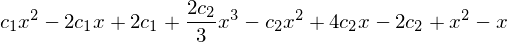

In [3]:
# symbols
c1, c2, x = symbols('c1 c2 x')

# differential operator
L = lambda f: -f.diff(x, x) - f + x ** 2

# approximate solution basis functions
phi0 = x
phi1 = x * (2 - x)
phi2 = x ** 2 * (1 - 2 * x / 3)

# Residual
R = L(phi0 + c1 * phi1 + c2 * phi2)
R.simplify()

### Galerkin Method

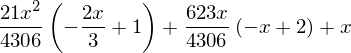

In [4]:
# Galerkin method
# wi = phii
gal = [integrate(phi1 * R, (x, 0, 1)), 
       integrate(phi2 * R, (x, 0, 1))]
c = solve(gal, c1, c2)
ugal = phi0 + c[c1] * phi1 + c[c2] * phi2
ugal

### Least Squares method

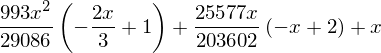

In [5]:
# Least squares method
# wi = dR/dci
lsq = [integrate(R.diff(c1) * R, (x, 0, 1)), 
       integrate(R.diff(c2) * R, (x, 0, 1))]
c = solve(lsq, c1, c2)
ulsq = phi0 + c[c1] * phi1 + c[c2] * phi2
ulsq

### Collocation method

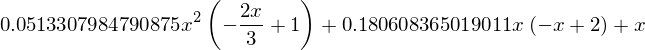

In [6]:
# Collocation method
# choose points x1 = 1/3, x2 = 2/3
col = [R.subs({x: 1. / 3.}), 
       R.subs({x: 2. / 3.})]
c = solve(col, c1, c2)
ucol = phi0 + c[c1] * phi1 + c[c2] * phi2
ucol

### Analytic solution

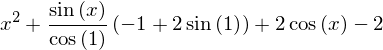

In [7]:
# analytical solution
u = Function('u')
sol = dsolve(L(u(x))).rhs
c = solve([sol.subs(x, 0), sol.diff(x).subs(x, 1) - 1], 'C1', 'C2')
sol = sol.subs(c)
sol

### Comparison of Solution Methods

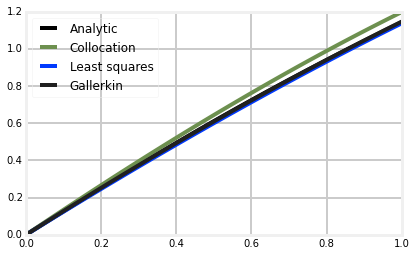

In [10]:
%matplotlib inline
f_ana = lambdify(x, sol)
f_col = lambdify(x, ucol)
f_lsq = lambdify(x, ulsq)
f_gal = lambdify(x, ugal)
xvals = linspace(0, 1, 100)
plot(xvals, [f_ana(xval) for xval in xvals], label="Analytic", color='black')
plot(xvals, [f_col(xval) for xval in xvals], label="Collocation")
plot(xvals, [f_lsq(xval) for xval in xvals], label="Least squares")
plot(xvals, [f_gal(xval) for xval in xvals], label="Gallerkin")
legend(loc="best");